In [267]:
from lxml import etree
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tiktoken
# How to use tiktoken: https://github.com/openai/openai-cookbook/blob/main/examples/How_to_count_tokens_with_tiktoken.ipynb

encoding = tiktoken.encoding_for_model("gpt-3.5-turbo") # Encoding 'cl100k_base'

In [260]:
from pathlib import Path

udhr_dir = Path('data/udhr')
token_dfs = {}

for filename in udhr_dir.glob('*.xml'):
    language = filename.stem[5:]
    print(language, end=' ')

    with open(filename) as f:
        tree = etree.parse(f)

    text = '\n'.join([tree.find('{http://www.unicode.org/udhr}title').text] + 
        [p.text for p in tree.find('{http://www.unicode.org/udhr}preamble').findall('.//{http://www.unicode.org/udhr}para')] +
        [p.text for article in tree.findall('{http://www.unicode.org/udhr}article')
                for p in article.findall('.//{http://www.unicode.org/udhr}para')])

    token_codes = encoding.encode(text)
    df = pd.DataFrame({'decoded': [encoding.decode([token]) for token in token_codes]}).drop_duplicates()
    df['length'] = df['decoded'].str.len()
    df['byte_length'] = df['decoded'].apply(lambda d: len(d.encode('utf-8')))
    token_dfs[language] = df

spa uig_latn ind heb fra pes_1 kor tgl arb vie swe cmn_hans por_BR deu_1996 nld rus ita ukr por_PT urd tur pol eng jpn hin 

In [282]:
TokenStatsByLanguage = pd.concat([pd.DataFrame({'lang': lang, 'stat': df.byte_length.describe()}) 
           for lang, df in token_dfs.items()]).reset_index(
           ).set_index(['lang','index']).unstack()['stat'].sort_values('count', ascending=False)

TokenStatsByLanguage

index,25%,50%,75%,count,max,mean,min,std
lang,,,,,,,,
deu_1996,3.0,4.0,5.0,900.0,14.0,4.102222,1.0,1.738332
ita,3.0,4.0,5.0,841.0,12.0,4.287753,1.0,1.919314
fra,3.0,4.0,6.0,839.0,15.0,4.889154,1.0,2.466165
por_PT,3.0,4.0,6.0,826.0,15.0,4.690073,1.0,2.173855
pol,2.0,3.0,4.0,783.0,10.0,3.274585,1.0,1.366368
por_BR,3.0,4.0,6.0,770.0,14.0,4.619481,1.0,2.144794
spa,3.0,5.0,6.0,768.0,14.0,4.990885,1.0,2.282790
nld,3.0,4.0,5.0,766.0,10.0,3.781984,1.0,1.540983
tur,2.0,3.0,4.0,721.0,9.0,3.185853,1.0,1.094872


In [283]:
TokenStatsByLanguage[['mean','count']]

index,mean,count
lang,,
deu_1996,4.102222,900.0
ita,4.287753,841.0
fra,4.889154,839.0
por_PT,4.690073,826.0
pol,3.274585,783.0
por_BR,4.619481,770.0
spa,4.990885,768.0
nld,3.781984,766.0
tur,3.185853,721.0


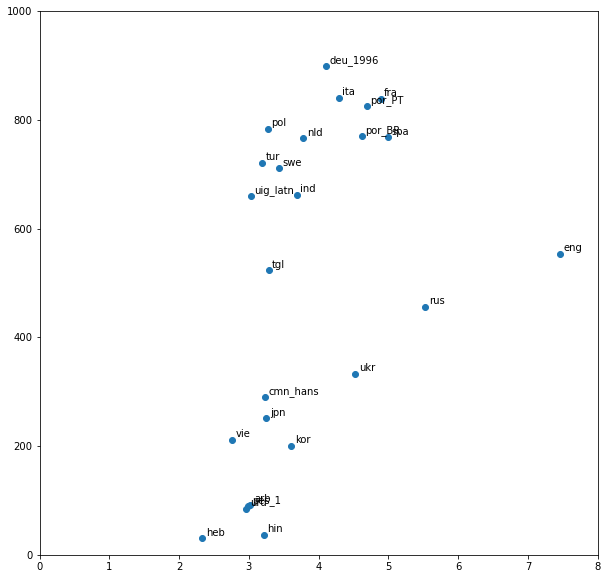

In [298]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(TokenStatsByLanguage['mean'], TokenStatsByLanguage['count'])
ax.set_xlim([0,8])
ax.set_ylim([0, 1000])

for i, txt in enumerate(TokenStatsByLanguage.index):
    ax.annotate(txt, (TokenStatsByLanguage['mean'][i] + 0.05, TokenStatsByLanguage['count'][i] + 5))


In [266]:
(lambda df:df[df['byte_length'] > 13])(token_dfs['rus'])

,decoded,length,byte_length
249,обходим,7,14
648,значение,9,17
2339,использов,10,19
3836,который,8,15
4461,результат,10,19
